# Week 2: Stereo Estimation

If you are working in Colab,
*   Open Files from left
*   Drag and drop `Week2_Stereo.zip` there (or click upload icon on top left). Upload can take a few minutes.
*   Unzip the file by running the following cell.



In [ ]:
#!unzip Week2_Stereo.zip
%cd Week2_Stereo

/content/Week2_Stereo


*   If you get disconnected from the runtime, you might need to upload this file again. Also, note that this is valid for other local files too eg. repos that have been cloned, files generated during execution etc. In short, if you see that your files are gone after a while, just run the cell that generates, clones, etc. the missing files again.

## Part A: Terminology

### Question 1: Depth vs. Disparity

What is the difference between *depth* and *disparity*? How are they related to each other **mathematically**?

**Answer**:  
Disparity is the horizontal displacement of a point’s projections between the left and the right image planes indicated with green lines. Depth is the length of the perpendicular line from the object in the 3D world to the Baseline. Disparity indicated with $d$ and is inversely proportional to depth as derived from the similar triangles indicated in the image below. The depth is indicated with the letter $z$. The displacement of the projections create similar triangles with respect to base $L$ and height $z$ which help us make the derivation. It is important to remember that $u’$ has negative coordinates and that $L+u’$ means that we are actually subtracting a number from $L$.

### Figure 1: taken from lecture slides

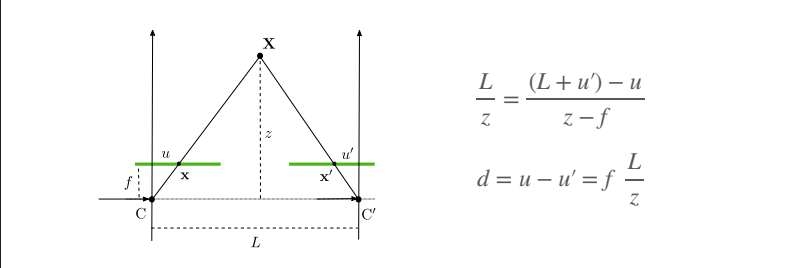

### Question 2: Calibrated Two-View Geometry

What do we assume to know in calibrated two-view geometry?

**Answer**:  
We are assuming that we know about the extrinsic and intrinsic parameters of the cameras that we are using those are mainly relative positions of the cameras and the internal parameters inside the cameras. Parameters like the focal length, scaling, distance between the cameras, which are needed to project, back project to or from the scenes are assumed to be known.

### Question 3: Epipolar Geometry

Define the following terms related to epipolar geometry in your own sentences. Feel free to use the figure from the class, somewhere else, or draw a figure and uplaod its photo.

**Epipolar Line**: Epipolar line is the red line indicated on this image. The Epipolar Line is created by using reference points drawn from X1, X2, X3 to Or. All the possible projections for the 3D x are indicated here meaning that if we are searching for x we can find x by looking at the epipolar line.

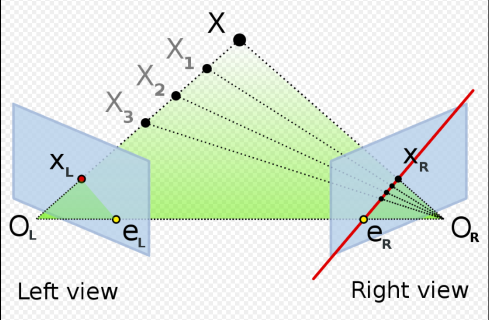



**Epipolar Plane**: Possible planes which can be created between three points which include the two camera centers in a point in the 3D world.

**Epipole**: Epipole is also referred to as an epipolar point. Which are indicated by eR and eL on the image above. Those are points which are connected directly to one another, the center of the camera’s and to the epipolar planes.

**Projection and Backprojection**: Projection(2D->3D) is achieved by creating an imaginary 2D line from a point in the 3D world (taking a picture). Backprojection(3D->2D) is achieved by doing the opposite of Projection with the use of a “backprojection ray”, which is by using a 2D plane and a 1D ray to indicate a point in the 3D World.

**Baseline**: Baseline is the line indicated by the yellow line which is the line from O1 to O2. Baseline connects the two cameras and it can also be named as the distance between the two cameras.

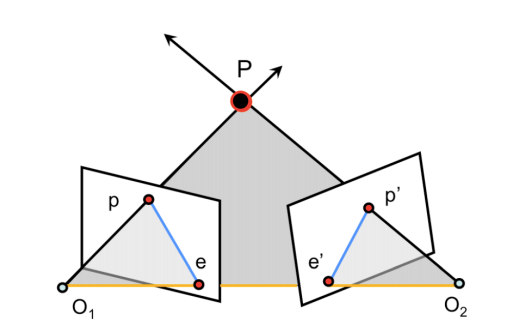

### Question 3: Rectification

What is *rectification* and why do we do it? Find out an example of a rectification process from the literature, e.g. how is it performed on KITTI?

**Answer:** 

We do rectification in order to convert epipolar lines parallel to the horizontal axis. Rectification is used to downgrade the complexity of our window search task because it linearizes and transforms the possible space where the window exists onto a horizontal line. Executing our search horizontally makes the task faster. Rotation matrix is used on the KITTI Dataset according to “Vision Meets Robotics: The KITTI Dataset”[Geiger et al].

### Question 4: Comparisons

1. What is the difference between *sparse* vs. *dense* methods? What is the historical reason for starting with sparse methods?
2. What is the difference between *local* vs. *global* methods? What is the historical reason for starting with local methods?



**Answer**:

1. Sparse method allows us to do comparisons between important point groups which indicate which indicate certain patterns such as edges, contours, intersections etc. Instead of using all the points that make up a scene, we select the groups of points to extract features in the spares method. In a way, sparse method helps us to select the point groups, which we will be extracting features from and reduce the number of computations. The historical reason why we start with the sparse method is because sparse method offers a less computationally expensive solution to our classification problems by allowing us to make resolutions only by considering certain groups of points instead of a whole. The dense method takes into account all of the points what exist on the scene and extract features for every point and therefore it is more computationally expensive.
2. Global methods execute search within all possible neighborhoods while Local methods concentrate on certain windows and executes search horizontally by raking those certain windows as reference. Local methods were the initial approach in the past as resources and computational power was a constraint. Global methods execute operations on groups of points instead of individual points in a scene. Each method has advantages and disadvantages but since looking for generalized patterns more desirable on our case, and since we have the resources available to us it is beneficial to choose General models during initial approach.


### Question 5: Winner Takes All (WTA)

Whar is the Winner Takes All (WTA) and how can it be used as the simplest optimizer for stereo estimation? 
* Why is it an attractive solution, especially historically?
* What are the potential problems with the WTA minimizer?

**Answer**: 

WTA is a stereo matching technique where the window, which has the lowest matching cost, is selected as the true disparity. The minimum matching cost is -1 and similarity value changes according to a similarity function. This method is a local method and therefore it is not computationally expensive. Due low computational cost this method was popular throughout time. The top problem with this method is that it looks for exact patterns and exact matches and the issue is that repeating patterns may exist at different parts on the same horizontal line causing the method to act in an unintended way. Similarly, there might be minor changes in the pattern that is being searched due to different light conditions and this would cause the method to make false decisions. 

### Question 6: Matching

Explain the following concepts in your own sentences.

*	**Brightness Constancy**: Old matching methods use this as an assumption. This assumption is based on the idea that the brightness is constant over different images, which does not represent the real case scenario. 
*	**Matching Cost Function**: This function produces lower results as the similarity between two windows increase and is a function to understand similarity between any two windows.
*	**Matching Ambiguity**: Indicates the causes of noise on previously implemented models such as changes in the direction of light. The cause of Matching Ambiguity is the slight changes on the points within the scenes. 
*	**Robust Cost Function**: Is created to handle the complexities caused by secularity within images.
*	**Cost Volume**: Input representations used in 3D files, which indicate the location and disparity of a point make up Cost Volume. Width, height and disparity is used to know where a point is and what its disparity is. Disparity is the size of possible disparities.


### Question 7: Belief Propagation (BP)

1. What is the point of BP or global reasoning with a graphical model in general?
2. What is the difference between max-product and sum-product algorithms? In which cases do we use each?
3. Why is the image graph loopy? What is the problem with loopy graphs?
4. Why do we work in the logarithmic domain? How do we go from probabilities to energy terms?
5. What is conditional in Conditional Random Field (CRF) model in case of stereo? In other words, what do we condition on?

**Answers**:

1-	Belief Propagation and global reasoning compare each pixel to all the other pixels on the image. Both methods define restricted neighborhoods for pixel types, which is a sign, that these methods are following a global approach on solving problems related to optimization. 

2-	Max-product algorithm is used to predict the next probable state among a set of states, which are in sequence. Sum- product algorithm is used to calculate the marginal probability of a single state. We use Max-Product algorithm if we want to learn about the sequence of states and if we want to detect the patterns among a set of states. We use Sum-Product algorithm if we want to learn about a single state.

3-	Loopy graphs contain nodes that make up a graph cyclic. This means that once an algorithm starts following from a starting point it will eventually get back to its starting point due to the connection among the nodes. The cyclic structure causes the algorithms to not converge which is the main problem. 

4-	We chose to work in the logarithmic domain in order to overcome the issues relating to numbers that are being too close to zero. We can go from probabilities to energy by defining energy as a function of all possible solutions. After we define it as a function it is easy to define our task which is to minimize energy. Our objective would be to find the state with maximum probability, by means optimizing on the energy minimization function and this would allow us to transfer from probabilities to energy. 

5-	We condition on the immediate face neighbor of a node when we apply Condition Random Field during stereo

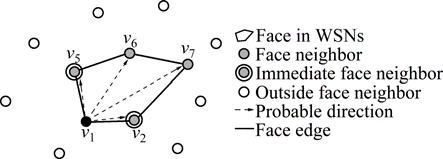


### Question 8: Semi-Global Matching (SGM)

Explain the two-level penalisation in SGM and comment on why it might work better than a regular smoothness function.

**Answer**:

The two level penalization refers to the two functions one of which use for detecting relatively large differences in disparity and one of which is used for relatively small differences in disparity. The “relatively” keyword here refers to a relative maximum and a relative minimum within the scene as there is no concrete definition of a minimum or maximum. The SGM method acts as a detector for sudden changes. The benefit of SGM is that the changes of the direction in light do not affect it as much as the prior methods.

### Question 9: Planarity

Why do we want to model planes in stereo estimation? Is it better or worse computationally? Does it work as regularizer, how?

**Answer**:

The reason why we use planes is because planes help us represent multiple pixels and that reduces computational cost. Planes give us a feature for classifying groups of pixels. Instead of finding the disparity of a single pixel, we calculate a normal, which represents a group of pixels, and this gives us a certain regularization. All the pixels on the plane have the same normal. Since multiple pixels are represented by a normal this reduces the irregularity and noise within nearby pixels. We learn a normal, which belongs to a plane, which represents a group of pixels, and therefore this reduces the number of computations. Imagine exerting the learning task on the disparity for each pixel instead of the normal that represent large groups of pixels, our learning task would be of magnitudes more expensive.

### Questions 10: Learning Patch Matching vs. Learning a Cost Volume

Compare the patch matching approach proposed in [Zbontar2016JMLR] vs. cost volume learning approach proposed in [Kendall2017ICCV]. 

**Answer**:

[Zbontar2016JMLR] proposes two neural networks one of with is a Siamese Network, which learn the features of the two patches and does patch matching according to a similarity score for patch pairs. [Zbontar2016JMLR] takes the Left and Right patches as input, exerts convolutional layers and extract features. On [Kendall2017ICCV] takes in the full image and extracts features from the entire image instead of extracting features from patches. In for every possible disparity value in [Kendall2017ICCV], there is an associated cost called volume because for every point in the image there is a height and width along with the third dimension, which is possible disparity value for that point. After creating those volumes, they apply 3D convolutions to learn the disparities. In [Kendall2017ICCV] if disparity has the maximum value it means that it has the highest similarity. 
Comparing the two methods it can be resolved that Learning Patch matching was a local approach while learning cost volume was a more global approach since [Zbontar2016JMLR] focuses on patches while [Kendall2017ICCV] focuses on the entire image. 


### Question 11: State-of-the-art (SOTA) on KITTI

Check out a few top-performing methods on the KITTI benchmark. What are the common factors among these methods? Also, check out both the quantitative and qualitative results on the benchmark page. What kind of mistakes do they make, can you see a pattern?

**Answer**:

In stereo matching task I checked out three papers where the networks are EdgeStereo, SegStereo and PSMNet. For all papers, it is common that they try to use contextual information in addition to the disparity estimation. This contextual information can be edge map or semantic information. 

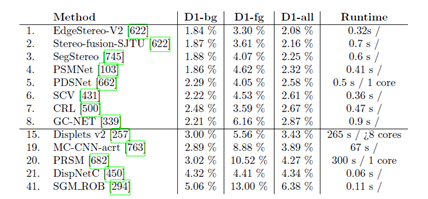

Without the context information, there are inevitable failures of stereo matching. Changes in illumination and non-rigid objects may cause failures. Also the reflective and transparent surfaces, repetitive objects are problematic regions for stereo matching.

## Part B: 3D

### Visualizing 3D data

Throughout the course, you will create mesh files (the ones with `ply` extension) for storing 3D data. You can visualize 3D data using a program such as MeshLab or Open3D. We recommend you to visualize `ply` files in your local machine as it is challenging in a notebook.   

**MeshLab**:
*   Install MeshLab: https://www.meshlab.net/#download
*   Visualize ply files: dragging `ply` file into an open MeshLab window should work.

**Open3D**:   
*   Install Open3D: http://www.open3d.org/docs/release/getting_started.html
*   Visualize ply file: http://www.open3d.org/docs/latest/tutorial/Basic/file_io.html#Mesh



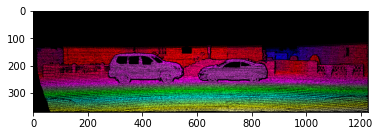

In [ ]:
import matplotlib.pyplot as plt
from util import *
import cv2

# load the data
leftI = load_image('data/000005_10_left_color.png')
rightI = load_image('data/000005_10_right_color.png')
dispI_gt = load_disp('data/000005_10_gt.png')
max_disp = np.max(dispI_gt)

plt.imshow(disp_to_color(dispI_gt, max_disp))

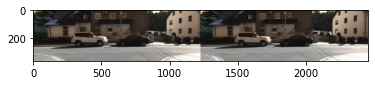

In [ ]:
plt.imshow(np.hstack([leftI, rightI]))

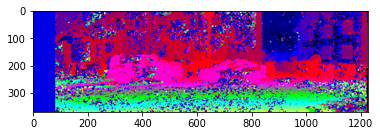

In [ ]:
NUM_DISP = 80
WINDOW_SIZE = 7

# use OPenCV's StereoSGBM method to compute disparity estimation dispI_est
# between the left image and the right image
# do not forget to divide the result by 16
predictor = cv2.StereoSGBM_create(numDisparities=NUM_DISP, blockSize=WINDOW_SIZE)
dispI_est = predictor.compute(leftI, rightI) /16
max_disp = np.max(dispI_est)
plt.imshow(disp_to_color(dispI_est, max_disp))

In [ ]:
dispI_gt.shape

(370, 1226)

In [ ]:
f = 718.86
cx = 607.19
cy = 185.22
B = 0.537
all_colors = cv2.cvtColor(leftI, cv2.COLOR_BGR2RGB)

def triangulate(dispI, fn):
  x_coor = np.zeros(dispI.shape)
  y_coor = np.zeros(dispI.shape)
  

  for i in range(x_coor.shape[0]): # creating x 
      x_coor[i] = i

  for i in range(y_coor.shape[0]): #creating y
      for j in range(y_coor.shape[1]):
          y_coor[i][j] = j

  z = np.zeros(np.shape(dispI))
  for i in range(z.shape[0]):
      for j in range(z.shape[1]):
          z[i][j] = (f*B) / dispI[i][j] #doing the division
          #weird div

  x = np.multiply((x_coor-cx),z)/f # doing the calculation for x
  y = np.multiply((y_coor-cy),z)/f # doing the calculation for y

  colors = np.array(all_colors)

  # z = infinite means d = 0 and therefore those points have to be excluded. 
  #The following block is used to detect and delete the points where there is the infity inconsisttency.  
  exclude_array = np.isinf(z)
  z = z[~exclude_array].reshape(1, -1)
  x = x[~exclude_array].reshape(1, -1)
  y = y[~exclude_array].reshape(1, -1)
  colors = colors[~exclude_array].reshape(1, -1)
  # the deletion of such points is done before the ply generation.
  points = np.array((x,y,z))

  points = np.swapaxes(points,0,2)
  write2ply(points, colors, fn)


triangulate(dispI_gt, 'out/pts_gt.ply')
triangulate(dispI_est, 'out/pts_est.ply')
print("done")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


done


Visualize the 3D point clouds using MeshLab or Open3D. Note that you might have to rotate the point cloud a little bit until you can make sense of it, especially with the estimated disparity map where there are outliers.

**Bonus**: Implement the outlier ratio metric of the KITTI to evaluate the estimation quantitatively.